<a href="https://colab.research.google.com/github/rakku-99/iNeuronLabs/blob/main/69_AdaBoost_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
len(df['quality'].unique())

6

In [ ]:
df['quality'].nunique()

6

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.duplicated().sum()


240

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
demo_df=pd.DataFrame([1,2,3,3,23,2,1,2,123,333])

In [ ]:
demo_df

,0
0,1
1,2
2,3
3,3
4,23
5,2
6,1
7,2
8,123
9,333


In [ ]:
demo_df.duplicated().sum()

4

In [ ]:
X=df.drop("quality",axis=1)

In [ ]:
y=df['quality']

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [ ]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()'''


'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_train,y_train)

1.0

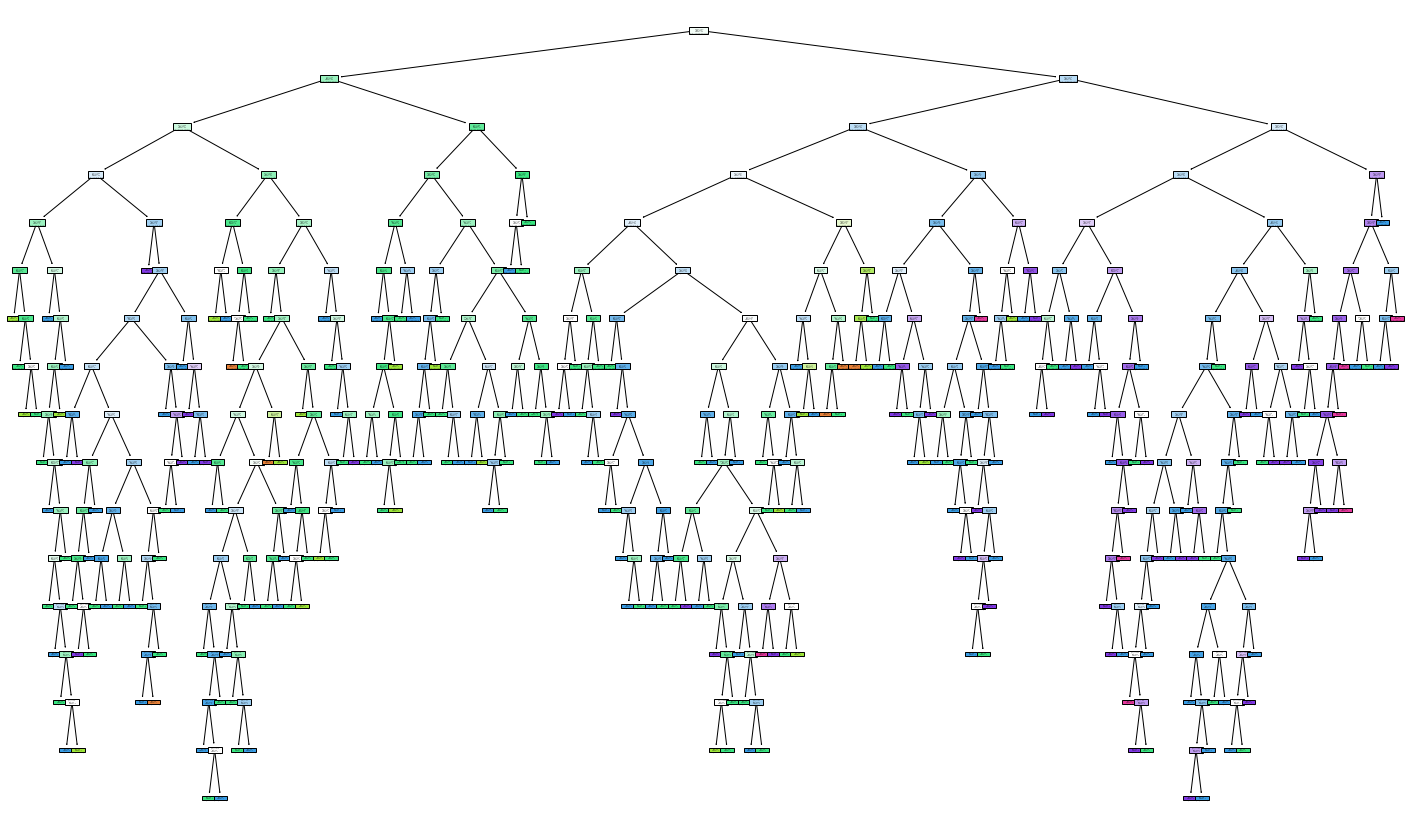

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [ ]:
fig.savefig("decistion_tree_classifier.png")

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_predict)

0.48775055679287305

In [ ]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [ ]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [ ]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')

In [ ]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.6653846153846154, 0.9285714285714286, 'X[10] <= 11.863\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.425, 0.7857142857142857, 'X[10] <= 10.956\ngini = 0.62\nsamples = 799\nvalue = [7, 30, 381, 302, 74, 5]'),
 Text(0.2423076923076923, 0.6428571428571429, 'X[10] <= 10.166\ngini = 0.568\nsamples = 639\nvalue = [6, 19, 352, 225, 37, 0]'),
 Text(0.12307692307692308, 0.5, 'X[1] <= 0.555\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.06153846153846154, 0.35714285714285715, 'X[6] <= 64.831\ngini = 0.57\nsamples = 212\nvalue = [1, 7, 113, 80, 11, 0]'),
 Text(0.03076923076923077, 0.21428571428571427, 'X[2] <= 0.166\ngini = 0.601\nsamples = 144\nvalue = [1, 5, 58, 69, 11, 0]'),
 Text(0.015384615384615385, 0.07142857142857142, 'gini = 0.537\nsamples = 32\nvalue = [0, 1, 20, 8, 3, 0]'),
 Text(0.046153846153846156, 0.07142857142857142, 'gini = 0.582\nsamples = 112\nvalue = [1, 4, 38, 61, 8, 0]'),
 Text(0.09230769230769231, 0.2142857142

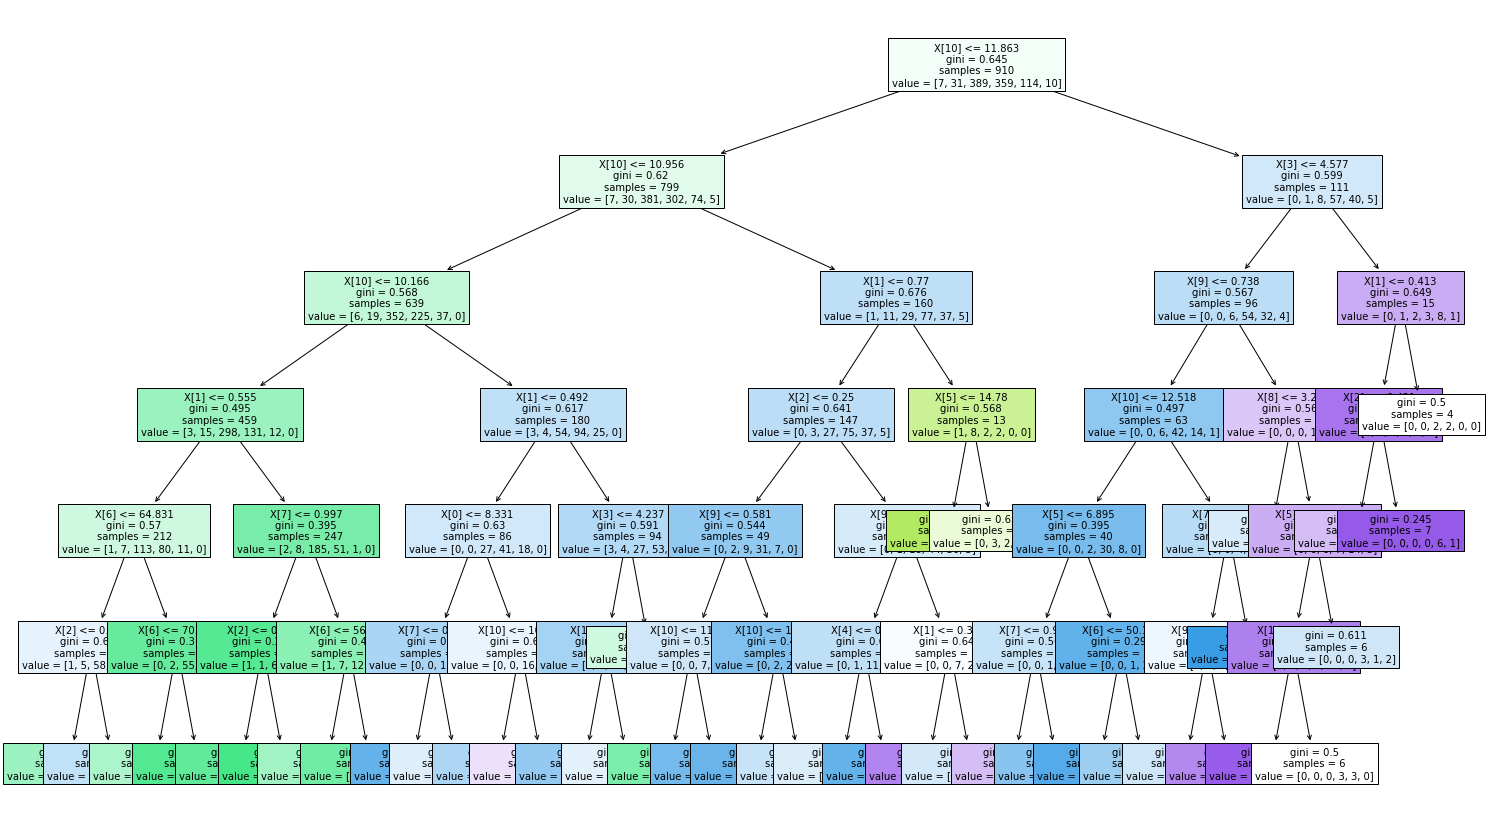

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [ ]:
y_prediction2=model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_prediction2)

0.48552338530066813

In [ ]:
#logistic regression, SVM ,  going forward(RF,XB,GB,AB)

#Implement the decision tree regressor
dataset:https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
        
take_refrence_from_here:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

```
# This is formatted as code
```



In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [ ]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=Rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.5924276169265034

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


KeyboardInterrupt: ignored

In [ ]:
grid_searh.best_params_

In [ ]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [ ]:
Rf_model_with_best_params.fit(X_train,y_train)

In [ ]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_rf_bp)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=50, random_state=0).fit(X_train,y_train)


In [ ]:
y_predict_bagging=model_bagging_svc.predict(X_test)


In [ ]:
accuracy_score(y_test,y_predict_bagging)

0.4766146993318486

In [ ]:
'''use bagging classiifer and regressor, extra tree classifier and regressor, voting classifer and regressor and random forest classifier and regressor on top of House hold consumpltion data and cencus data

data link: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption
        https://archive.ics.uci.edu/ml/datasets/census+income
    
sklearn_link:https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

SyntaxError: ignored

Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ab=AdaBoostClassifier()

In [ ]:
model_ab.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_ab=model_ab.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_ab)

0.5211581291759465

In [ ]:
grid_param_ab={
    'n_estimators':[90,100,130,150],
    'learning_rate':[0.001,0.01,0.1,0.5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_ab=GridSearchCV(estimator=model_ab,param_grid=grid_param_ab,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_search_ab.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [90, 100, 130, 150]},
             verbose=2)

In [ ]:
grid_search_ab.best_params_

{'learning_rate': 0.001, 'n_estimators': 90}

In [ ]:
model_AB=AdaBoostClassifier(learning_rate= 0.001, n_estimators = 90)

In [ ]:
model_AB.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=90)

In [ ]:
y_pred_AB=model_AB.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_AB)

0.5278396436525612